In [0]:
!uname

Linux


# Downloading training dataset

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2019-11-07 18:44:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  88.4MB/s    in 1.6s    

2019-11-07 18:44:16 (88.4 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



#Downloading Validation datset

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2019-11-07 18:46:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.09s   

2019-11-07 18:46:32 (126 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



#unzipping to access to file system

In [0]:
import os
import zipfile

local_zipfile = '/tmp/horse-or-human.zip'
zip_ref= zipfile.ZipFile(local_zipfile,'r')
zip_ref.extractall('/tmp/horse-or-human')

local_zipfile = '/tmp/validation-horse-or-human.zip'
zip_ref= zipfile.ZipFile(local_zipfile,'r')
zip_ref.extractall('/tmp/validation-horse-or-human')

zip_ref.close()


#Defining the directory

In [0]:
training_horse_dir = os.path.join('/tmp/horse-or-human/horses')
training_human_dir = os.path.join('/tmp/horse-or-human/humans')
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

#Store file names in a variable

In [0]:
train_horse_names = os.listdir(training_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(training_human_dir)
print(train_human_names[:10])

['horse43-3.png', 'horse17-5.png', 'horse36-8.png', 'horse08-5.png', 'horse11-4.png', 'horse02-4.png', 'horse49-7.png', 'horse07-5.png', 'horse02-8.png', 'horse30-8.png']
['human16-18.png', 'human15-14.png', 'human07-21.png', 'human10-14.png', 'human06-07.png', 'human09-29.png', 'human13-14.png', 'human01-30.png', 'human09-15.png', 'human07-10.png']


#Print total number of images in the directory

In [0]:
print('Total training horses name: ', len(os.listdir(training_horse_dir)))
print('Total training humans name: ', len(os.listdir(training_human_dir)))
print('Total validation horses name: ', len(os.listdir(validation_horse_dir)))
print('Total validation humans name: ', len(os.listdir(validation_human_dir)))

Total training horses name:  500
Total training humans name:  527
Total validation horses name:  128
Total validation humans name:  128


# Take a look at some pictures

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

cols=4
rows=5
image_index=0

gcf ---> get current figure -- provide a reference

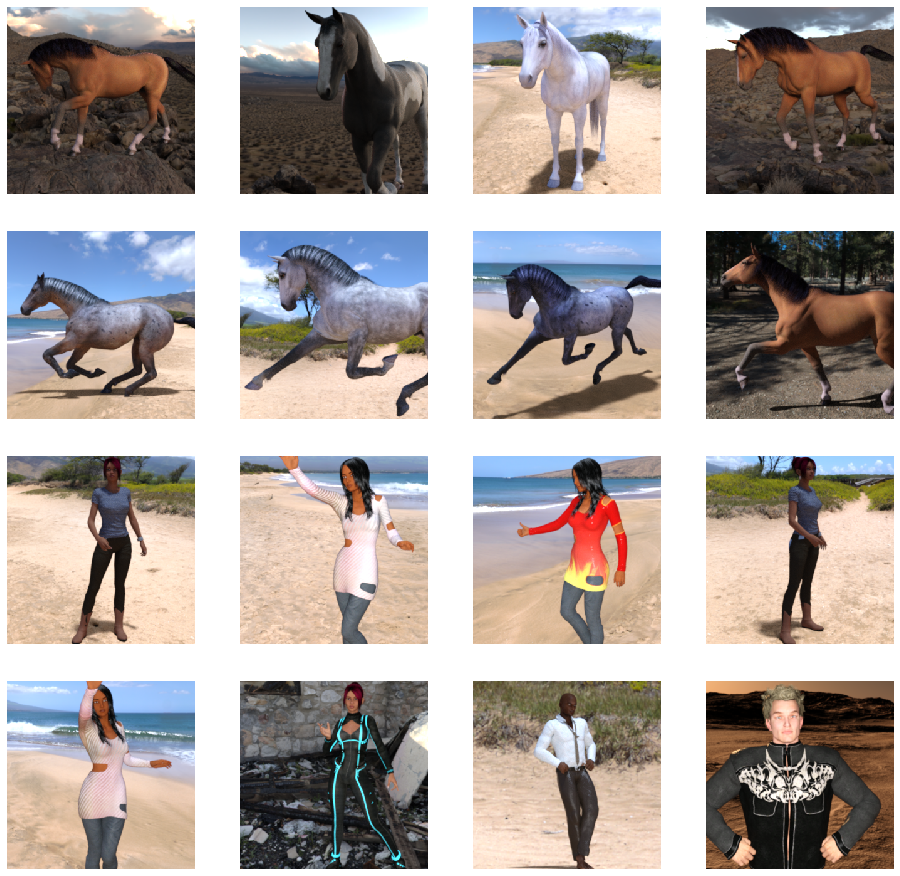

In [0]:
fig = plt.gcf()
fig.set_size_inches(cols*4,rows*4)

image_index += 8

next_horse_pic = [os.path.join(training_horse_dir,filename) for filename in train_horse_names[image_index-8:image_index]]
next_human_pic = [os.path.join(training_human_dir,filename) for filename in train_human_names[image_index-8:image_index]]

for i,img_path in enumerate(next_horse_pic+next_human_pic):
  sp=plt.subplot(rows,cols,i+1)
  sp.axis('OFF')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


#Building the Model

In [0]:
import tensorflow as tf
from tensorflow import keras


In [0]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                                 keras.layers.MaxPool2D(2,2),
                                 keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 keras.layers.MaxPool2D(2,2),
                                 keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 keras.layers.MaxPool2D(2,2),
                                 keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 keras.layers.MaxPool2D(2,2),
                                 keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 keras.layers.MaxPool2D(2,2),

                                 keras.layers.Flatten(),
                                 keras.layers.Dense(512, activation = 'relu'),
                                 keras.layers.Dense(1,activation='sigmoid')

                                 ])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), metrics=['acc'], loss='binary_crossentropy')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#Data Preprocessing



In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1/255.0)
validation_datagen = ImageDataGenerator(rescale=1/255.0)

In [0]:
train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human', target_size=(300,300),batch_size=128, class_mode= 'binary')
validation_generator = validation_datagen.flow_from_directory('/tmp/validation-horse-or-human', target_size=(300,300),batch_size=32, class_mode= 'binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


#Training

In [0]:
history = model.fit_generator(train_generator,epochs =15, verbose=1,steps_per_epoch=8,validation_data=validation_generator,validation_steps=8)

Epoch 1/15
8/8 [==============================] - 80s 10s/step - loss: 1.2901 - acc: 0.5061 - val_loss: 0.7030 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 77s 10s/step - loss: 0.6701 - acc: 0.5829 - val_loss: 0.5931 - val_acc: 0.5703
Epoch 3/15
8/8 [==============================] - 84s 11s/step - loss: 0.7069 - acc: 0.6631 - val_loss: 0.6031 - val_acc: 0.6328
Epoch 4/15
8/8 [==============================] - 67s 8s/step - loss: 0.5944 - acc: 0.7067 - val_loss: 0.4963 - val_acc: 0.8359
Epoch 5/15
8/8 [==============================] - 85s 11s/step - loss: 0.5923 - acc: 0.8125 - val_loss: 6.6814 - val_acc: 0.5000
Epoch 6/15
8/8 [==============================] - 75s 9s/step - loss: 0.8717 - acc: 0.7809 - val_loss: 0.3416 - val_acc: 0.8867
Epoch 7/15
8/8 [==============================] - 75s 9s/step - loss: 0.3736 - acc: 0.8165 - val_loss: 1.0416 - val_acc: 0.7617
Epoch 8/15
8/8 [==============================] - 66s 8s/step - loss: 0.1694 - acc: 0.9574 - val_los

#Test the generated model

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image


In [0]:

uploaded = files.upload()


Saving horsehumanimages.jpg to horsehumanimages.jpg
Saving horseimages.jpg to horseimages (1).jpg
Saving humanimages.jpg to humanimages.jpg


In [0]:

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

[1.]
horsehumanimages.jpg is a human
[0.]
horseimages.jpg is a horse
[1.]
humanimages.jpg is a human


In [0]:
model.save('binary classification v1')